In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)
from xgboost import XGBClassifier
import os


In [3]:
train_file = uproot.open(r"C:\Users\Agastya\OneDrive\Desktop\train_rooot_file.root")
test_file  = uproot.open(r"C:\Users\Agastya\OneDrive\Desktop\test_root_file.root")

print(train_file.keys())


['deepntuplizer;1', 'deepntuplizer/tree;42', 'deepntuplizer/tree;41']


In [4]:
train_tree = train_file["deepntuplizer/tree;42"]
test_tree = test_file["deepntuplizer/tree;42"]


In [5]:
file_path = r"C:\Users\Agastya\OneDrive\Desktop\train_rooot_file.root"

# open the file and tree
train_file = uproot.open(file_path)
print("Available keys in ROOT file:", train_file.keys())

# open the tree 
tree = train_file["deepntuplizer/tree"]
print("\nNumber of branches:", len(tree.keys()))
print("First 40 branches:\n", tree.keys()[:100])


Available keys in ROOT file: ['deepntuplizer;1', 'deepntuplizer/tree;42', 'deepntuplizer/tree;41']

Number of branches: 219
First 40 branches:
 ['Delta_gen_pt', 'event_no', 'gen_pt', 'isB', 'isBB', 'isC', 'isG', 'isLeptonicB', 'isLeptonicB_C', 'isS', 'isUD', 'isUndefined', 'jet_corr_pt', 'jet_eta', 'jet_looseId', 'jet_no', 'jet_phi', 'jet_pt', 'jet_tightId', 'npv', 'ntrueInt', 'pfBoostedDoubleSecondaryVertexAK8BJetTags', 'pfCombinedInclusiveSecondaryVertexV2BJetTags', 'pfCombinedMVAV2BJetTags', 'pfDeepCSVJetTags_probb', 'pfDeepCSVJetTags_probbb', 'pfDeepCSVJetTags_probc', 'pfDeepCSVJetTags_probcc', 'pfDeepCSVJetTags_probudsg', 'pfJetBProbabilityBJetTags', 'pfJetProbabilityBJetTags', 'rho', 'softPFElectronBJetTags', 'softPFMuonBJetTags', 'fj_doubleb', 'fj_eta', 'fj_gen_eta', 'fj_gen_pt', 'fj_isBB', 'fj_isH', 'fj_isNonBB', 'fj_isQCD', 'fj_isTop', 'fj_isW', 'fj_isZ', 'fj_jetNTracks', 'fj_label', 'fj_labelJMAR', 'fj_labelLegacy', 'fj_mass', 'fj_nSV', 'fj_n_sdsubjets', 'fj_nbHadrons', 'fj_n

In [ ]:

import uproot
import pandas as pd

file_path = r"C:\Users\Agastya\OneDrive\Desktop\train_rooot_file.root"

tree = uproot.open(file_path)["deepntuplizer/tree"]


feature_cols = [
    "fj_pt", "fj_eta", "fj_phi", "fj_mass", "fj_sdmass",
    "fj_tau1", "fj_tau2", "fj_tau3", "fj_tau21", "fj_tau32",
    "fj_jetNTracks", "fj_nSV", "fj_sdn2",
    "fj_sdsj1_csv", "fj_sdsj2_csv",
    "pfDeepCSVJetTags_probb", "pfDeepCSVJetTags_probbb",
    "pfDeepCSVJetTags_probc", "pfDeepCSVJetTags_probcc",
    "fj_doubleb",
]


label_col = "fj_isH"

# Load data
data = tree.arrays(feature_cols + [label_col], library="pd")

# Rename label to something cleaner
data["label"] = data[label_col].astype(int)

# Drop unused
data = data.dropna(subset=feature_cols)

print("Data loaded:", data.shape)
print("Class balance:")
print(data["label"].value_counts())

data.head()



Data loaded: (200000, 22)
Class balance:
label
0    175246
1     24754
Name: count, dtype: int64


,fj_pt,fj_eta,fj_phi,fj_mass,fj_sdmass,fj_tau1,fj_tau2,fj_tau3,fj_tau21,fj_tau32,...,fj_sdn2,fj_sdsj1_csv,fj_sdsj2_csv,pfDeepCSVJetTags_probb,pfDeepCSVJetTags_probbb,pfDeepCSVJetTags_probc,pfDeepCSVJetTags_probcc,fj_doubleb,fj_isH,label
0,448.633636,-0.277724,-2.183877,68.060570,4.911332,0.067988,0.059589,0.044930,0.876467,0.753994,...,0.000073,0.072580,0.071605,0.0,0.0,0.0,0.0,-0.760041,0,0
1,868.861389,-0.716812,2.365500,161.474731,34.992409,0.111101,0.087648,0.072055,0.788904,0.822090,...,0.001675,0.133219,0.062745,0.0,0.0,0.0,0.0,-0.853918,0,0
2,573.674377,0.219193,0.296306,86.054962,13.481631,0.073106,0.061262,0.049685,0.837985,0.811027,...,0.000554,0.536389,0.155396,0.0,0.0,0.0,0.0,0.528992,0,0
3,206.318527,0.336462,2.244762,35.347668,18.484650,0.132059,0.086257,0.064672,0.653168,0.749767,...,0.005919,0.322999,-10.000000,0.0,0.0,0.0,0.0,-0.677520,0,0
4,1068.199097,0.889782,-2.385019,139.384796,99.316536,0.116926,0.040401,0.032547,0.345525,0.805614,...,0.012706,0.916934,0.995029,0.0,0.0,0.0,0.0,0.455310,1,1


In [ ]:


# Feature and label branches
feature_cols = ["jet_pt", "jet_eta", "jet_phi", "jet_corr_pt", "npv","jet_looseId","jet_tightId"]
label_cols = ["isB", "isBB", "isC", "isG", "isS", "isUD"]

def load_root_dataset(path):
    tree = uproot.open(path)["deepntuplizer/tree"]
    df = tree.arrays(feature_cols + label_cols, library="pd")
    df["label"] = df[label_cols].idxmax(axis=1).str.replace("is", "")
    df = df.dropna(subset=["label"])
    return df

train_df = load_root_dataset(train_path)
test_df = load_root_dataset(test_path)

print(" Train:", train_df.shape)
print(" Test:", test_df.shape)
print("Classes (train):\n", train_df["label"].value_counts())


 Train: (200000, 14)
 Test: (200000, 14)
Classes (train):
 label
G     62297
UD    59919
BB    32976
C     25179
B     10861
S      8768
Name: count, dtype: int64


In [ ]:
import numpy as np

def add_physics_features(df):
    
    df = df.copy()

    #  Basic transformations 
    df["log_pt"] = np.log(df["jet_pt"].clip(lower=1e-6))
    df["abs_eta"] = df["jet_eta"].abs()
    df["log_abs_eta"] = np.log(df["abs_eta"].clip(lower=1e-6))

    #  2. Ratios (avoid divide-by-zero)
    df["corr_ratio"] = df["jet_corr_pt"] / df["jet_pt"].replace(0, 1e-6)
    df["pt_over_eta"] = df["jet_pt"] / df["abs_eta"].replace(0, 1e-6)

    # 3. Angular physics interaction term 
    df["phi_eta_product"] = df["jet_phi"] * df["jet_eta"]

    # 4. Pile-up normalized variables 
    df["pt_per_npv"] = df["jet_pt"] / (df["npv"] + 1)
    df["corr_pt_per_npv"] = df["jet_corr_pt"] / (df["npv"] + 1)

    #  5. Jet ID combinations
    df["loose_tight_ratio"] = df["jet_looseId"] / df["jet_tightId"].replace(0, 1e-6)
    df["tight_minus_loose"] = df["jet_tightId"] - df["jet_looseId"]

    return df



In [ ]:

label_cols = ["isB", "isBB", "isC", "isG", "isS", "isUD"]


feature_cols = [
    "jet_pt", "jet_eta", "jet_phi", "jet_corr_pt",
    "npv", "jet_looseId", "jet_tightId"
]


import uproot
import pandas as pd

def load_root_dataset(path):
    tree = uproot.open(path)["deepntuplizer/tree"]
    df = tree.arrays(feature_cols + label_cols, library="pd")

    # Derive final jet label category from one-hot labels
    df["label"] = df[label_cols].idxmax(axis=1).str.replace("is", "")

    # Remove rows with missing label (rare but safe)
    df = df.dropna(subset=["label"])

    return df

train_df = load_root_dataset(train_path)
test_df = load_root_dataset(test_path)

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)
print("Train label counts:\n", train_df["label"].value_counts())


train_df = add_physics_features(train_df)
test_df = add_physics_features(test_df)



physics_features = [
    "log_pt",
    "abs_eta",
    "log_abs_eta",
    "corr_ratio",
    "pt_over_eta",
    "phi_eta_product",
    "pt_per_npv",
    "corr_pt_per_npv",
    "loose_tight_ratio",
    "tight_minus_loose"
]

feature_cols_extended = feature_cols + physics_features


print("\nTotal number of features:", len(feature_cols_extended))
print(feature_cols_extended)


X_train = train_df[feature_cols_extended].copy()
y_train = train_df["label"].copy()

X_test = test_df[feature_cols_extended].copy()
y_test = test_df["label"].copy()

print("\nFinal shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)



Train shape: (200000, 14)
Test shape : (200000, 14)
Train label counts:
 label
G     62297
UD    59919
BB    32976
C     25179
B     10861
S      8768
Name: count, dtype: int64

Total number of features: 17
['jet_pt', 'jet_eta', 'jet_phi', 'jet_corr_pt', 'npv', 'jet_looseId', 'jet_tightId', 'log_pt', 'abs_eta', 'log_abs_eta', 'corr_ratio', 'pt_over_eta', 'phi_eta_product', 'pt_per_npv', 'corr_pt_per_npv', 'loose_tight_ratio', 'tight_minus_loose']

Final shapes:
X_train: (200000, 17)
y_train: (200000,)
X_test : (200000, 17)
y_test : (200000,)


In [ ]:

feature_cols = [
    "jet_pt", "jet_eta", "jet_phi", "jet_corr_pt",
    "npv", "jet_looseId", "jet_tightId"
]


physics_features = [
    "log_pt",
    "abs_eta",
    "log_abs_eta",
    "corr_ratio",
    "pt_over_eta",
    "phi_eta_product",
    "pt_per_npv",
    "corr_pt_per_npv",
    "loose_tight_ratio",
    "tight_minus_loose"
]


feature_cols_extended = feature_cols + physics_features

y_train = train_df["label"]
y_test  = test_df["label"]

X_train = train_df[feature_cols_extended]
X_test  = test_df[feature_cols_extended]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Total features used:", len(feature_cols_extended))
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)



Total features used: 17
X_train_scaled shape: (200000, 17)
X_test_scaled shape: (200000, 17)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)

y_test_encoded = le.transform(y_test)

label_mapping = {cls: idx for cls, idx in zip(le.classes_, le.transform(le.classes_))}
print("Label mapping:", label_mapping)



Label mapping: {'B': 0, 'BB': 1, 'C': 2, 'G': 3, 'S': 4, 'UD': 5}


Label mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Train subset: (160000, 29)
Validation: (40000, 29)


[I 2025-11-21 13:52:14,686] A new study created in memory with name: no-name-95eab2fa-bdf4-4bd9-853c-0c5820adbc6c


Train subset: (160000, 29)
Validation: (40000, 29)


  0%|          | 0/60 [00:00<?, ?it/s]

[I 2025-11-21 13:52:39,980] Trial 0 finished with value: 0.75074762975 and parameters: {'max_depth': 6, 'learning_rate': 0.28365703253300917, 'n_estimators': 694, 'subsample': 0.6726032494937983, 'colsample_bytree': 0.8935078615591562, 'gamma': 4.290721624362157, 'min_child_weight': 5, 'reg_alpha': 8.953469015049187, 'reg_lambda': 9.906498276174347}. Best is trial 0 with value: 0.75074762975.
[I 2025-11-21 13:53:24,757] Trial 1 finished with value: 0.7419954866875 and parameters: {'max_depth': 7, 'learning_rate': 0.23757957603585908, 'n_estimators': 661, 'subsample': 0.7101616336560034, 'colsample_bytree': 0.6830814076848255, 'gamma': 1.0224694296444992, 'min_child_weight': 1, 'reg_alpha': 4.70463187782255, 'reg_lambda': 0.49305610357679885}. Best is trial 0 with value: 0.75074762975.
[I 2025-11-21 13:53:50,085] Trial 2 finished with value: 0.750783980875 and parameters: {'max_depth': 4, 'learning_rate': 0.26213435530175583, 'n_estimators': 797, 'subsample': 0.7867727240660154, 'colsam

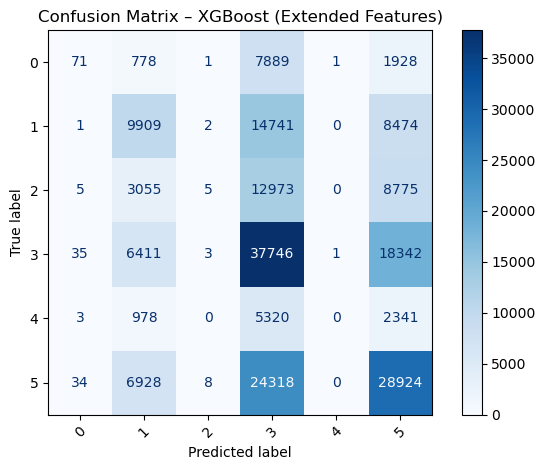

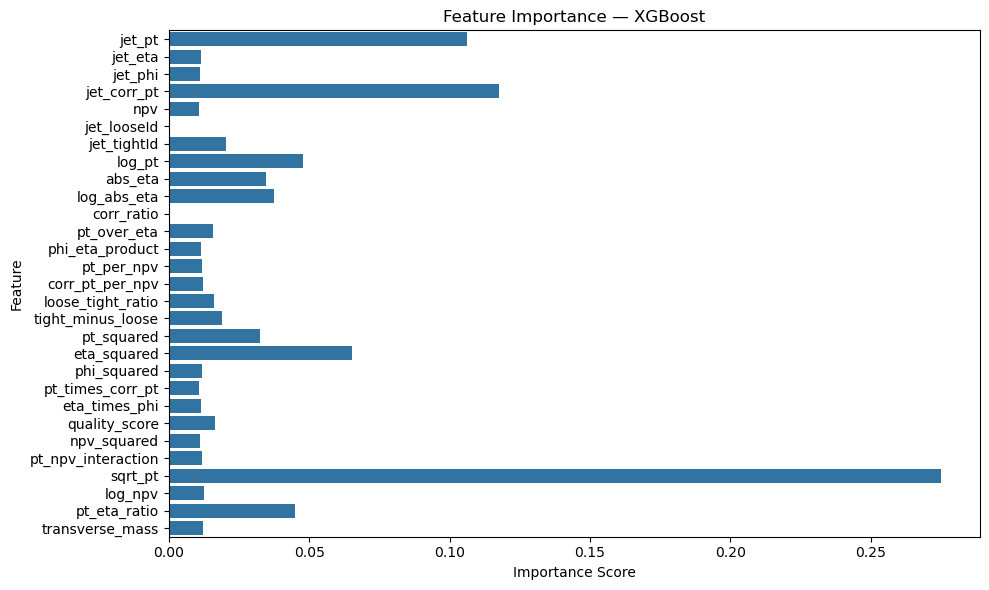

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.transform(y_test)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled,
    y_train_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_train_encoded
)

print("Train subset:", X_train_sub.shape)
print("Validation:", X_val.shape)

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, 
    y_train_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train_encoded
)

print("Train subset:", X_train_sub.shape)
print("Validation:", X_val.shape)





import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val)

def objective(trial):

    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 200, 900),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 7),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),

        "objective": "multi:softprob",
        "num_class": 6,
        "eval_metric": "mlogloss",
        "tree_method": "hist"
    }

    model = XGBClassifier(**params)
    model.fit(X_train_sub, y_train_sub)

    y_prob = model.predict_proba(X_val)
    auc_micro = roc_auc_score(y_val_bin, y_prob, multi_class="ovr", average="micro")

    return auc_micro

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60, show_progress_bar=True)

print("Best Micro AUC:", study.best_value)
print("Best Params:", study.best_params)

####XGB model with extended physics features

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="mlogloss",
    tree_method="hist"
)

xgb.fit(X_train_scaled, y_train_encoded)

y_pred_encoded = xgb.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix – XGBoost (Extended Features)")
plt.grid(False)
plt.tight_layout()
plt.show()

feature_cols_extended = feature_cols + physics_features

importances = xgb.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_cols_extended)
plt.title("Feature Importance — XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout() 
plt.show()


Macro AUC: 0.6195
Micro AUC: 0.7538


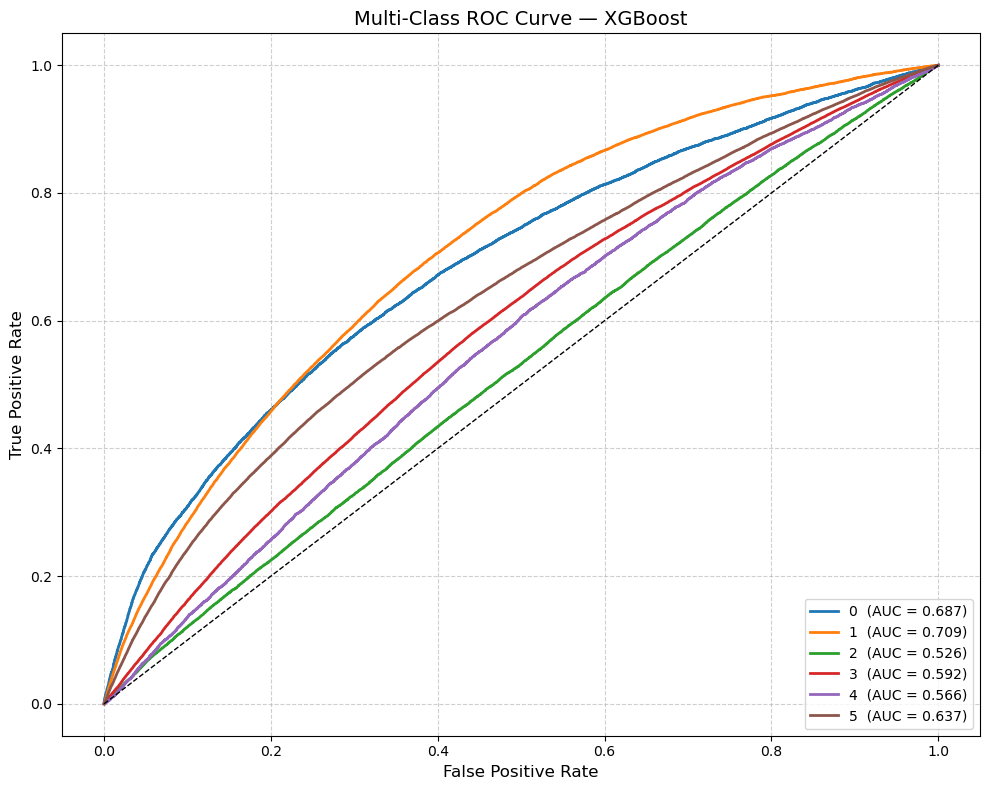

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


y_proba = xgb.predict_proba(X_test_scaled)

lb = LabelBinarizer()
lb.fit(le.classes_)          
y_test_bin = lb.transform(y_test)


fpr, tpr, roc_auc = {}, {}, {}

for i, class_label in enumerate(lb.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


macro_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="macro")
micro_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="micro")

print(f"Macro AUC: {macro_auc:.4f}")
print(f"Micro AUC: {micro_auc:.4f}")

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(lb.classes_):
    plt.plot(
        fpr[i],
        tpr[i],
        linewidth=2,
        label=f"{class_label}  (AUC = {roc_auc[i]:.3f})"
    )

# Baseline random classifier line
plt.plot([0, 1], [0, 1], "k--", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Multi-Class ROC Curve — XGBoost", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()

plt.savefig("xgb_multiclass_roc_auc.png", dpi=300, bbox_inches="tight")

plt.show()
